# The probe phase

# HPC Cluster: gnuparallel

## Separated *whole* simulation directories

On a cluster, *whole* simulations are organized into *whole* directories, where each *whole* directory contains all the files for a given *whole* simulation. The **gnuparallel** is used to parallelize the **probe** phase at the **shell** level. For this purpose, all the python modules and scripts are separatedly installed and run on each core. For instance, if 32 cores are available, then the files in 32 *whole* directories are simulatenously installed. However, each *whole* directory may contains multiple topology and trajectory pairs. Thus, there is parallelization at the level of *whole* directories, not at the level of the *segment* or *whole* trajectories inside a *whole* directory. Inside each *whole* directory, a python **main_probe.py** script analyzes the trajectories in a sequential way.

- trj and all *segments* on a cluster

For each *whole* directory, the following script is executed by means of *gnuparallel*. See these scripts: *probe-1.7-all_trj_segments.py* and *probe-1.7-bug_trj_segments*

## Sum-rule project

#### whole bug trjs

In [ ]:
from glob import glob
from polyphys.manage import organizer
from polyphys.probe import prober


# analyzing bug files.
group = 'bug'
lineage = 'whole'
save_to = './'
bug_pairs = glob('./N*' + group + '*')
bug_pairs = organizer.sort_filenames(
    bug_pairs,
    fmts=['.' + group + '.data', '.' + group + '.lammpstrj']
)
bug_pairs
for (bug_topo, bug_trj) in bug_pairs:
    prober.sum_rule_bug_cyl(bug_topo, bug_trj, lineage, save_to=save_to)

#### segment bug trjs

In [ ]:
from glob import glob
from polyphys.manage import organizer
from polyphys.probe import prober
from polyphys.manage.parser import SumRuleCyl


group = 'bug'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
bug_trjs = glob('./N*' + group + '*')
bug_trjs = organizer.sort_filenames(
    bug_trjs,
    fmts=['.' + group + '.lammpstrj']
)
bug_trjs = [bug_trj[0] for bug_trj in bug_trjs]
bug_topo = glob('./N*' + group + '*')
bug_topo = organizer.sort_filenames(bug_topo, fmts=['.' + group + '.data'])
bug_topo = bug_topo[0][0]
max_segment_id = len(bug_trjs)
# analyzing all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for bug_trj in bug_trjs:
    trj_info = SumRuleCyl(
        bug_trj, topo_lineage, 'cylindrical', group, 'linear'
        )
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.sum_rule_bug_cyl(bug_topo, bug_trj, lineage, save_to=save_to)
    else:
        prober.sum_rule_bug_cyl(
            bug_topo,
            bug_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

#### segment all trjs

In [ ]:
from glob import glob
from polyphys.manage import organizer
from polyphys.probe import prober
from polyphys.manage.parser import SumRuleCyl


group = 'all'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob('./N*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs,
    fmts=['.' + group + '.lammpstrj']
)
all_trjs = [all_trj[0] for all_trj in all_trjs]
all_topo = glob('./N*' + group + '*')
all_topo = organizer.sort_filenames(all_topo, fmts=['.' + group + '.data'])
all_topo = all_topo[0][0]
max_segment_id = len(all_trjs)
# analyzing all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = SumRuleCyl(
        all_trj, topo_lineage, 'cylindrical', group, 'linear'
        )
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.sum_rule_all_cyl(all_topo, all_trj, lineage, save_to=save_to)
    else:
        prober.sum_rule_all_cyl(
            all_topo,
            all_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

#### segment all trjs: hist_dd

In [ ]:
from glob import glob
from polyphys.manage import organizer
from polyphys.probe import prober
from polyphys.manage.parser import SumRuleCyl

geometry = 'biaxial'
group = 'all'
top_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob('./N*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs, fmts=['.' + group + '.lammpstrj']
    )
all_trjs = [all_trj[0] for all_trj in all_trjs]
all_top = glob('./N*' + group + '*')
all_top = organizer.sort_filenames(all_top, fmts=['.' + group + '.data'])
all_top = all_top[0][0]
max_segment_id = len(all_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = SumRuleCyl(all_trj, top_lineage, 'cylindrical', group, 'linear')
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.sum_rule_all_cyl_hist2d(
            all_top, all_trj, lineage, save_to=save_to
        )
    else:
        prober.sum_rule_all_cyl_hist2d(
            all_top,
            all_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

## Trans-Foci project

### Cylindrical
#### whole bug trjs
Each *bug topology* comes with only **one** *bug trajectory*.

In [ ]:
from glob import glob
from polyphys.manage import organizer
from polyphys.probe import prober
from polyphys.manage.parser import TransFociCyl

# analyzing bug files.
group = 'bug'
lineage = 'whole'
save_to = './'
bug_pairs = glob('./eps*' + group + '*')
bug_pairs = organizer.sort_filenames(
    bug_pairs,
    fmts=['.' + group + '.data', '.' + group + '.lammpstrj']
)
for (bug_topo, bug_trj) in bug_pairs:
    prober.trans_fuci_bug_cyl(bug_topo, bug_trj, lineage, save_to=save_to)

#### segment all trjs

In [ ]:
group = 'all'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob('./eps*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs,
    fmts=['.' + group + '.lammpstrj']
)
all_trjs = [all_trj[0] for all_trj in all_trjs]
all_topo = glob('./eps*' + group + '*')
all_topo = organizer.sort_filenames(all_topo, fmts=['.' + group + '.data'])
all_topo = all_topo[0][0]
max_segment_id = len(all_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = TransFociCyl(all_trj, topo_lineage, 'cylindrical', group, 'ring')
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.trans_foci_all_cyl(all_topo, all_trj, lineage, save_to=save_to)
    else:
        prober.trans_foci_all_cyl(
            all_topo,
            all_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

#### whole bug trjs: transverse_size
Each *bug topology* comes with only **one** *bug trajectory*.

In [ ]:
from glob import glob
from polyphys.manage import organizer
from polyphys.probe import prober

# analyzing bug files.
group = 'bug'
lineage = 'whole'
save_to = './'
bug_pairs = glob('./eps*' + group + '*')
bug_pairs = organizer.sort_filenames(
    bug_pairs,
    fmts=['.' + group + '.data', '.' + group + '.lammpstrj']
)
for (bug_topo, bug_trj) in bug_pairs:
    prober.trans_fuci_bug_cyl_transverse_size(
        bug_topo, bug_trj, lineage, save_to=save_to
    )

#### segment all trjs: hist_dd

In [ ]:
group = 'all'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob('./eps*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs,
    fmts=['.' + group + '.lammpstrj']
)
all_trjs = [all_trj[0] for all_trj in all_trjs]
all_topo = glob('./eps*' + group + '*')
all_topo = organizer.sort_filenames(all_topo, fmts=['.' + group + '.data'])
all_topo = all_topo[0][0]
max_segment_id = len(all_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = TransFociCyl(
        all_trj,
        topo_lineage,
        'cylindrical',
        group,
        'ring'
    )
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.trans_foci_all_cyl_hist2d(
            all_topo, all_trj, lineage, save_to=save_to
        )
    else:

        prober.trans_foci_all_cyl_hist2d(
            all_topo,
            all_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

### Cubic

#### whole bug trjs
Each *bug topology* comes with only **one** *bug trajectory*.

In [ ]:
from glob import glob
from polyphys.manage import organizer
from polyphys.probe import prober
from polyphys.manage.parser import TransFociCub

# analyzing bug files.
geometry = 'biaxial'
group='bug'
lineage = 'whole'
save_to = './'
bug_pairs = glob('./al*' + group + '*')
bug_pairs = organizer.sort_filenames(
    bug_pairs,
    fmts=['.' + group + '.data', '.' + group + '.lammpstrj']
)
for (bug_topo, bug_trj) in bug_pairs:
    prober.trans_fuci_bug_cub(bug_topo, bug_trj, lineage, save_to=save_to)

#### segment all trjs

In [ ]:
group = 'all'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob('./al*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs,
    fmts=['.' + group + '.lammpstrj']
)
all_trjs = [all_trj[0] for all_trj in all_trjs]
all_topo = glob('./al*' + group + '*')
all_topo = organizer.sort_filenames(all_topo, fmts=['.' + group + '.data'])
all_topo = all_topo[0][0]
max_segment_id = len(all_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = TransFociCub(all_trj, topo_lineage, 'cubic', group, 'ring')
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.trans_foci_all_cub(
            all_topo, all_trj, lineage, save_to=save_to
        )
    else:
        prober.trans_foci_all_cub(
            all_topo,
            all_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

# PC Serial scheme

There are 4 different types of directories from which only one type can be in a *space* directory.

There are separated **whole** directories in each of which there **all** and **bug** **whole** trajectories; or, there are again separated **whole** directories in each of which there are **all** and **bug** **segment** trajectories. Below there are two groups of scrips for **serial** and **parallel** running schemes.


On a PC, the *whole* directories are located in a master *space-trjs* directory; however, one main python script probes all the *whole* directories in a parallel scheme via Dask. This is different from the *gnuparallel*-based approach in which each *whole* directory has its own copy of the required scripts and a main python script is run to probe that directory individually.

## Sumrule project
### Cylindrical
#### whole bug trjs

In [ ]:
# analyzing bug files.
group = 'bug'
lineage = 'whole'
save_to = './'
#path = "/Users/amirhsi_mini/trjs/epss5.0epsl5.0r10.5al5.0nl5ml125ns200ac1.0nc*lz77.0dt0.005bdump5000adump5000ens1ring/*.bug*"
path = "/Users/amirhsi/Downloads/N2000epsilon5.0r15.5lz379.5sig6.0nc1779dt0.005bdump1000adump5000ens7"
bug_pairs = glob(path + '/N*' + group + '*')
bug_pairs = organizer.sort_filenames(
    bug_pairs,
    fmts=['.' + group + '.data', '.' + group + '.lammpstrj']
)
for (bug_topo, bug_trj) in bug_pairs:
    prober.sum_rule_bug_cyl(
        bug_topo,
        bug_trj,
        lineage,
        continuous=False,
        save_to = save_to
    )

#### segment bug trjs

In [ ]:
# 1 min and 45 s for ~30000 particles with one all trj
input_path = "/Users/amirhsi/Downloads/N2000epsilon5.0r15.5lz379.5sig6.0nc1779dt0.005bdump1000adump5000ens7"
group = 'bug'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
bug_trjs = glob(input_path + '/N*' + group + '*')
bug_trjs = organizer.sort_filenames(
    bug_trjs,
    fmts=['.' + group + '.lammpstrj']
)
bug_trjs = [bug_trj[0] for bug_trj in bug_trjs]
bug_topo = glob(input_path + '/N*' + group + '*')
bug_topo = organizer.sort_filenames(bug_topo, fmts=['.' + group + '.data'])
bug_topo = bug_topo[0][0]
max_segment_id = len(bug_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for bug_trj in bug_trjs:
    trj_info = SumRuleCyl(
        bug_trj,
        topo_lineage,
        'cylindrical',
        group,
        'linear'
    )
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.sum_rule_bug_cyl(
            bug_topo, bug_trj, lineage, save_to=save_to
        )
    else:
        prober.sum_rule_bug_cyl(
            bug_topo,
            bug_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

#### segment all trjs: hist_1d and hist_2d

In [ ]:
# 4 mins for ~4000 particles with one all trj
parent = "/Users/amirhsi_mini/research_data/trjs"
#parent = "/Users/amirhsi/Downloads/N2000epsilon5.0r15.5lz379.5sig6.0nc1779dt0.005bdump1000adump5000ens7"
group = 'all'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob(parent + '/N*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs,
    fmts=['.' + group + '.lammpstrj']
)
all_trjs = [all_trj[0] for all_trj in all_trjs]
print(all_trjs)
all_topo = glob(parent + '/N*' + group + '*')
print(all_topo)
all_topo = organizer.sort_filenames(all_topo, fmts=['.' + group + '.data'])
all_topo = all_topo[0][0]
max_segment_id = len(all_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = SumRuleCyl(
        all_trj,
        topo_lineage,
        'cylindrical',
        group,
        'linear'
    )
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.sum_rule_all_cyl(
            all_topo, all_trj, lineage, save_to=save_to
        )
    else:
        prober.sum_rule_all_cyl(
            all_topo,
            all_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

#### segment all trjs: hist_2d

In [ ]:
%%time
# 10 mins for N2000epsilon5.0r13.0lz259.0sig1.0nc133547dt0.005bdump1000adump5000ens1 2 all trjs
trjs_db = "/Users/amirhsi_mini/research_data/trjs/N2000epsilon5.0r13.0lz259.0sig1.0nc133547dt0.005bdump1000adump5000ens1"
#trjs_db = "/Users/amirhsi/Downloads/N2000epsilon5.0r15.5lz379.5sig6.0nc1779dt0.005bdump1000adump5000ens7"
group = 'all'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob(trjs_db + '/N*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs,
    fmts=['.' + group + '.lammpstrj']
)
all_trjs = [all_trj[0] for all_trj in all_trjs]
print(all_trjs)
all_topo = glob(trjs_db + '/N*' + group + '*')
print(all_topo)
all_topo = organizer.sort_filenames(all_topo, fmts=['.' + group + '.data'])
all_topo = all_topo[0][0]
max_segment_id = len(all_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = SumRuleCyl(
        all_trj,
        topo_lineage,
        'cylindrical',
        group,
        'linear'
    )
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.sum_rule_all_cyl_hist2d(
            all_topo, all_trj, lineage, save_to=save_to
        )

    else:
        prober.sum_rule_all_cyl_hist2d(
            all_topo,
            all_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

## Trans-Foci project

### Cylindrical

#### whole bug trjs

In [ ]:
# analyzing bug files.
group = 'bug'
linage = 'whole'
save_to = './'
#macmini_path = "/Users/amirhsi_mini/trjs/epss5.0epsl5.0r10.5al5.0nl5ml125ns200ac1.0nc*lz77.0dt0.005bdump5000adump5000ens1ring/*.bug*"
macbookpro_path = "/Users/amirhsi/Downloads/epss5epsl5r10.5al5nl5ml125ns400ac1nc27720lz77dt0.005bdump2000adump5000ens8"
bug_pairs = glob(macbookpro_path + '/eps*' + group + '*')
bug_pairs = organizer.sort_filenames(
    bug_pairs,
    fmts=['.' + group + '.data', '.' + group + '.lammpstrj']
)
for (bug_topo, bug_trj) in bug_pairs:
    prober.trans_fuci_bug_cyl(
        bug_topo,
        bug_trj,
        lineage,
        save_to = save_to
    )

#### segment all trjs

In [ ]:
# 1 min and 45 s for ~30000 particles with one all trj
#macbookpro_path = "/Users/amirhsi/Downloads/epss5epsl5r10.5al5nl5ml125ns400ac1nc27720lz77dt0.005bdump2000adump5000ens8"
macmini_path = '/Users/amirhsi_mini/research_data/test'
group = 'all'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob(macmini_path + '/eps*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs,
    fmts=['.' + group + '.lammpstrj']
)
all_trjs = [all_trj[0] for all_trj in all_trjs]
all_topo = glob(macmini_path + '/eps*' + group + '*')
all_topo = organizer.sort_filenames(all_topo, fmts=['.' + group + '.data'])
all_topo = all_topo[0][0]
max_segment_id = len(all_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = TransFociCyl(
        all_trj,
        topo_lineage,
        'cylindrical',
        group,
        'ring'
    )
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.trans_foci_all_cyl(
            all_topo, all_trj, lineage, save_to=save_to
        )
    else:
        prober.trans_foci_all_cyl(
            all_topo,
            all_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

#### segment bug trjs: transverse size

In [ ]:
# analyzing bug files.
group = 'bug'
linage = 'whole'
save_to = './'
#macmini_path = "/Users/amirhsi_mini/trjs/epss5.0epsl5.0r10.5al5.0nl5ml125ns200ac1.0nc*lz77.0dt0.005bdump5000adump5000ens1ring/*.bug*"
macbookpro_path = "/Users/amirhsi/Downloads/epss5epsl5r10.5al5nl5ml125ns400ac1nc27720lz77dt0.005bdump2000adump5000ens8"
bug_pairs = glob(macbookpro_path + '/eps*' + group + '*')
bug_pairs = organizer.sort_filenames(
    bug_pairs,
    fmts=['.' + group + '.data', '.' + group + '.lammpstrj']
)
for (bug_topo, bug_trj) in bug_pairs:
    prober.trans_fuci_bug_cyl_transverse_size(
        bug_topo,
        bug_trj,
        lineage,
        save_to = save_to
    )

#### segment all trjs: hist_2d

In [ ]:
# 1 min and 45 s for ~30000 particles with one all trj
#macbookpro_path = "/Users/amirhsi/Downloads/epss5epsl5r10.5al5nl5ml125ns400ac1nc27720lz77dt0.005bdump2000adump5000ens8"
macmini_path = '/Users/amirhsi_mini/research_data/test'
group = 'all'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob(macmini_path + '/eps*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs,
    fmts=['.' + group + '.lammpstrj']
)
all_trjs = [all_trj[0] for all_trj in all_trjs]
all_topo = glob(macmini_path + '/eps*' + group + '*')
all_topo = organizer.sort_filenames(all_topo, fmts=['.' + group + '.data'])
all_topo = all_topo[0][0]
max_segment_id = len(all_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = TransFociCyl(
        all_trj,
        topo_lineage,
        'cylindrical',
        group,
        'ring'
    )
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.trans_foci_all_cyl_hist2d(
            all_topo, all_trj, lineage, save_to=save_to
        )
    else:
        prober.trans_foci_all_cyl_hist2d(
            all_topo,
            all_trj,
            lineage,
            save_to=save_to,
            continuous=True
        )

### Cubic

#### whole bug trjs

In [ ]:
# analyzing bug files.
group = 'bug'
lineage = 'whole'
save_to = './'
#macmini_path = "/Users/amirhsi_mini/trjs/epss5.0epsl5.0r10.5al5.0nl5ml125ns200ac1.0nc*lz77.0dt0.005bdump5000adump5000ens1ring/*.bug*"
macbookpro_path = "/Users/amirhsi_mini/research_data/al1nl5ml1ns400ac1nc160392l36dt0.005bdump2000adump5000ens1.ring"
bug_pairs = glob(macbookpro_path + '/al*' + group + '*')
bug_pairs = organizer.sort_filenames(
    bug_pairs,
    fmts=['.' + group + '.data', '.' + group + '.lammpstrj']
)
for (bug_topo, bug_trj) in bug_pairs:
    prober.trans_fuci_bug_cub(
        bug_topo,
        bug_trj,
        lineage,
        save_to = save_to
    )

#### segment all trjs

In [ ]:
%%time
# 1 min and 45 s for ~30000 particles with one all trj
macbookpro_path = "/Users/amirhsi_mini/research_data/al1nl5ml1ns400ac1nc160392l36dt0.005bdump2000adump5000ens1.ring"
#macmini_path = '/Users/amirhsi_mini/research_data/test'
group = 'all'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob(macbookpro_path + '/al*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs,
    fmts=['.' + group + '.lammpstrj.gz']
)
all_trjs = [all_trj[0] for all_trj in all_trjs]
all_topo = glob(macbookpro_path + '/al*' + group + '*')
all_topo = organizer.sort_filenames(all_topo, fmts=['.' + group + '.data'])
all_topo = all_topo[0][0]
max_segment_id = len(all_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = TransFociCub(all_trj, topo_lineage, 'cubic', group, 'ring')
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.trans_foci_all_cub(all_topo, all_trj, lineage, save_to=save_to)
    else:
        prober.trans_foci_all_cub(all_topo, all_trj, lineage, save_to=save_to,
            continuous=True
        )

## HNS project
### Cubic

#### whole bug trjs

In [ ]:
%%time
from glob import glob
from polyphys.manage import organizer
from polyphys.probe import prober
from polyphys.manage.parser import HnsCub
# analyzing bug files.
group = 'nucleoid'
lineage = 'whole'
save_to = './'
#probe_path = "/Users/amirhsi_mini/research_data/hns_cubic-trjs/N*/N*"
#probe_path = "../../Datasets/N200epshm29kbmm2nh48ac1nc95493l25dt0.005ndump2000adump5000ens1.ring"
probe_path = "../../Datasets/TestTrajectories/N200epshm29kbmm2nh48ac1nc95493l25dt0.005ndump2000adump5000ens1.ring-truncated_for_tests-No_backup-Keep_it"
nuc_pairs = glob(probe_path + '/N*' + group + '*')
nuc_pairs = organizer.sort_filenames(
    nuc_pairs,
    fmts=['.' + group + '.data', '.' + group + '.lammpstrj']
)
for (nuc_topo, nuc_trj) in nuc_pairs:
    prober.hns_nucleoid_cub(
        nuc_topo,
        nuc_trj,
        lineage,
        save_to = save_to
    )

#### segment all trjs

In [ ]:
%%time
from glob import glob
from polyphys.manage import organizer
from polyphys.probe import prober
from polyphys.manage.parser import HnsCub
# ~6 min for 3 trjs, each with 100 frames
probe_path = "../../Datasets/TestTrajectories/N200epshm29kbmm2nh48ac1nc95493l25dt0.005ndump2000adump5000ens1.ring-truncated_for_tests-No_backup-Keep_it"
group = 'all'
topo_lineage = 'whole'
lineage = 'segment'
save_to = './'
all_trjs = glob(probe_path + '/N*' + group + '*')
all_trjs = organizer.sort_filenames(
    all_trjs,
    fmts=['.' + group + '.lammpstrj']
)
all_trjs = [all_trj[0] for all_trj in all_trjs]
all_topo = glob(probe_path + '/N*' + group + '*')
all_topo = organizer.sort_filenames(all_topo, fmts=['.' + group + '.data'])
all_topo = all_topo[0][0]
max_segment_id = len(all_trjs)
# analyzig all files
# it is assumed that the all trjs are numbers from 1 to max_segment_id
for all_trj in all_trjs:
    trj_info = HnsCub(all_trj, topo_lineage, 'cubic', group, 'ring')
    # all the frames in the last segment are probed:
    if trj_info.segment_id == max_segment_id:
        prober.hns_all_cub(all_topo, all_trj, lineage, save_to=save_to)
    else:
        prober.hns_all_cub(all_topo, all_trj, lineage, save_to=save_to,
            continuous=True
        )

### Cylindrical

In [3]:
%%time
from glob import glob
from polyphys.manage import organizer
from polyphys.probe import prober
from polyphys.manage.parser import HnsCyl
# analyzing bug files.
group = 'nucleoid'
lineage = 'whole'
save_to = './'
#save_to = '/Users/amirhsi_mini/research_data/hns_cyl-trjs/'
probe_path = "/Users/amirhsi_mini/research_data/hns_cyl-trjs/N*"
probe_path = "../../Datasets/N200kbmm2r4.5nh12ac2lz75nc552ens2.ring"
#probe_path = "../../Datasets/TestTrajectories/N200epshm29kbmm2nh48ac1nc95493l25dt0.005ndump2000adump5000ens1.ring-truncated_for_tests-No_backup-Keep_it"
nuc_pairs = glob(probe_path + '/N*' + group + '*')
nuc_pairs = organizer.sort_filenames(
    nuc_pairs,
    fmts=['.' + group + '.data', '.' + group + '.lammpstrj']
)
nuc_pairs

CPU times: user 1.4 ms, sys: 1.4 ms, total: 2.8 ms
Wall time: 3.21 ms


[('../../Datasets/N200kbmm2r4.5nh12ac2lz75nc552ens2.ring/N200kbmm2r4.5nh12ac2lz75nc552ens2.ring.nucleoid.data',
  '../../Datasets/N200kbmm2r4.5nh12ac2lz75nc552ens2.ring/N200kbmm2r4.5nh12ac2lz75nc552ens2.ring.nucleoid.lammpstrj')]

In [4]:
for (nuc_topo, nuc_trj) in nuc_pairs[-1:]:
    prober.hns_nucleoid_cyl(
        nuc_topo,
        nuc_trj,
        lineage,
        save_to = save_to
    )

Setting the name of analyze file...

N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid is analyzing...

done.


In [5]:
import numpy as np

In [6]:
glob('./N*')

['./N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-stamps.csv',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-distMatMonCoreT.npy',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-shapeTMon.npy',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-distMatMonPatchT.npy',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-distMatMonMonT.npy',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-gyrTMon.npy',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-fsdTMon.npy',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-transSizeTMon.npy',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-asphericityTMon.npy',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-bondLengthVecMon.npy',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-bondCosineCorrVecMon.npy',
 './N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-principalTMon.npy']

In [7]:
dist_m_hpatch_t = np.load('./N200kbmm2r4.5nh12ac2lz75nc552ens2.ring-nucleoid-distMatMonPatchT.npy')

In [30]:
lj_cut = np.round(2**(1/6),6)
dmon = 1
dhpatch = 0.178
rcut_m_hpatch = np.round(0.5 * lj_cut * (dmon + dhpatch), 6)
rcut_m_hpatch

0.66113

In [33]:
contact_m_hpatch_t = np.asarray(dist_m_hpatch_t < rcut_m_hpatch, dtype=int)


In [42]:
contact_m_m_t = np.tensordot(contact_m_hpatch_t, contact_m_hpatch_t.T, axis=1)

TypeError: tensordot() got an unexpected keyword argument 'axis'

In [55]:
contact_m_hpatch_t_T = np.transpose(contact_m_hpatch_t, axes=(0,2,1))

In [66]:
contact_m_m_t = np.einsum('mij,mjk->mik', contact_m_hpatch_t, contact_m_hpatch_t_T, optimize = True)

<Axes: >

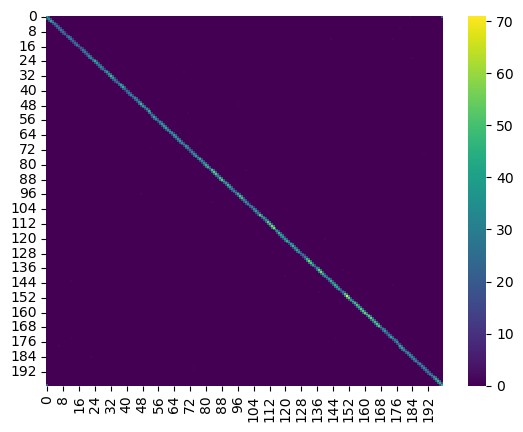

In [78]:
sns.heatmap(contact_m_m_t.sum(axis=0), cmap='viridis')

In [74]:
contact_m_m_t.sum(axis=0)

array([[42, 18,  0, ...,  0,  0, 20],
       [18, 37, 16, ...,  0,  0,  0],
       [ 0, 16, 44, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 48, 22,  0],
       [ 0,  0,  0, ..., 22, 45, 17],
       [20,  0,  0, ...,  0, 17, 46]])

In [34]:
import seaborn as sns

<Axes: >

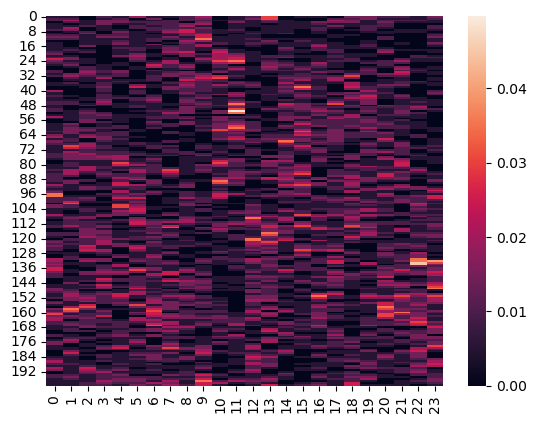

In [37]:
sns.heatmap(contact_m_hpatch_t.sum(axis=0)/contact_m_hpatch_t.shape[0]/)